**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

**Import ATAC peaks**

In [2]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End")
dat = read_tsv(fpath, col_names = cnames)
dat = dat %>%
    dplyr::mutate(
        Peak   = paste0(Chrom, ":", Start, "-", End),
        Length = End - Start
    )

dat_peak_atac_wgs = dat
print(dim(dat))
head(dat)

Rows: 247520 Columns: 3
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Chrom
dbl (2): Start, End

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 247520      5


Chrom,Start,End,Peak,Length
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr1,10015,10442,chr1:10015-10442,427
chr1,14253,14645,chr1:14253-14645,392
chr1,16015,16477,chr1:16015-16477,462
chr1,17237,17772,chr1:17237-17772,535
chr1,28903,29613,chr1:28903-29613,710
chr1,30803,31072,chr1:30803-31072,269


**Import ASTARR coverage**

In [3]:
ASSAY  = "KS91_K562_ASTARRseq"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "result.Log2FC.raw.cpm.WGS.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_cpm_astarr = dat
print(dim(dat))
head(dat)

Rows: 246852 Columns: 5
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Peak
dbl (4): Input, Output, Log2FC, pLog2FC

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 246852      5


Peak,Input,Output,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100006256-100006880,0.3598771,0.27972893,-0.3634750,-0.08763805
chr1:100010437-100010915,0.2864004,0.11723589,-1.2886193,-0.20340596
chr1:10002087-10003910,1.1744072,0.73767579,-0.6708739,-0.32346318
chr1:100021298-100021629,0.2315873,0.08680546,-1.4156988,-0.18042524
chr1:100023727-100023976,0.1525263,0.13048766,-0.2251446,-0.02785442
chr1:100027983-100029702,1.4579204,1.03898361,-0.4887391,-0.26958803


## Merge data

In [4]:
dat = inner_join(
    dat_peak_atac_wgs,
    dat_peak_cpm_astarr,
    by = "Peak"
)

dat_peak_full = dat
print(dim(dat))
head(dat)

[1] 246852      9


Chrom,Start,End,Peak,Length,Input,Output,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10015,10442,chr1:10015-10442,427,0.4863317,0.09736537,-2.3204599,-0.43771215
chr1,14253,14645,chr1:14253-14645,392,0.3152472,0.27902967,-0.1760648,-0.04028420
chr1,16015,16477,chr1:16015-16477,462,0.4361424,0.15900628,-1.4557156,-0.30931046
chr1,17237,17772,chr1:17237-17772,535,0.8007562,0.22194085,-1.8511878,-0.55942840
chr1,28903,29613,chr1:28903-29613,710,0.7629703,0.16679463,-2.1935541,-0.59545755
chr1,30803,31072,chr1:30803-31072,269,0.2774187,0.21678565,-0.3557958,-0.07015643


## Visualization

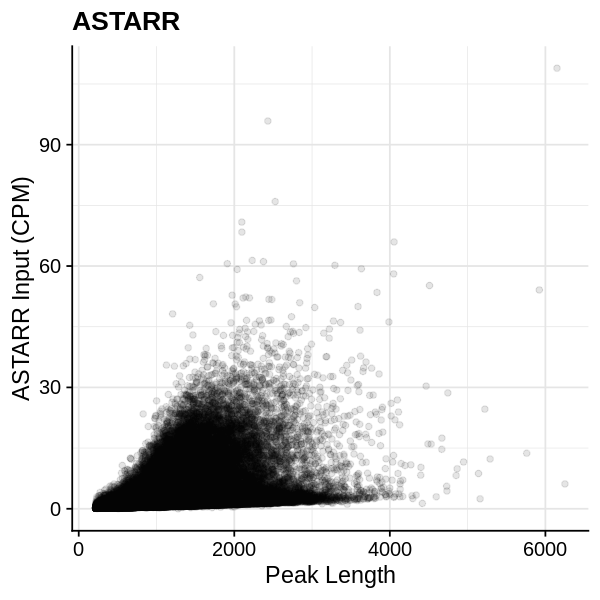

In [5]:
dat = dat_peak_full

gpt = ggplot(dat, aes(x=Length, y=Input)) +
    geom_point(alpha = 0.1) + 
    labs(x="Peak Length", y="ASTARR Input (CPM)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

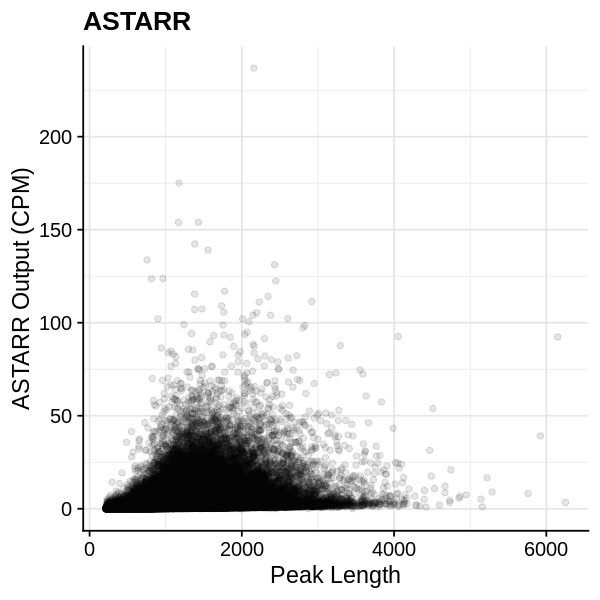

In [6]:
dat = dat_peak_full

gpt = ggplot(dat, aes(x=Length, y=Output)) +
    geom_point(alpha = 0.1) + 
    labs(x="Peak Length", y="ASTARR Output (CPM)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

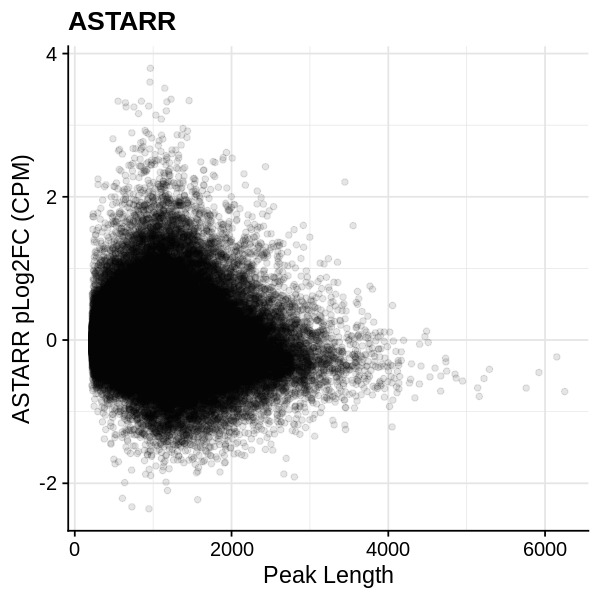

In [7]:
dat = dat_peak_full

gpt = ggplot(dat, aes(x=Length, y=pLog2FC)) +
    geom_point(alpha = 0.1) + 
    labs(x="Peak Length", y="ASTARR pLog2FC (CPM)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

## Remove lenght effects
1. Regress out the length effect
2. Calculate FPKM

In [8]:
### init
dat = dat_peak_full
fun = function(x){(x-min(x))/(max(x)-min(x))}

### regress out the length effect for input
fit = lm(Input  ~ Length, data=dat)
res = residuals(fit)
dat$Input_Residual = res
dat$Input_Score    = fun(res)

### regress out the length effect for output
fit = lm(Output ~ Length, data=dat)
res = residuals(fit)
dat$Output_Residual = res
dat$Output_Score    = fun(res)

### calculate FPKM for input and output
dat = dat %>% dplyr::mutate(
    Input_FPKM  = Input  / Length * 1000,
    Output_FPKM = Output / Length * 1000
)

### assign and show
dat_peak_score = dat
print(dim(dat))
head(dat)

[1] 246852     15


Chrom,Start,End,Peak,Length,Input,Output,Log2FC,pLog2FC,Input_Residual,Input_Score,Output_Residual,Output_Score,Input_FPKM,Output_FPKM
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10015,10442,chr1:10015-10442,427,0.4863317,0.09736537,-2.3204599,-0.43771215,0.25149985,0.1362392,-0.1433799,0.07463616,1.1389501,0.2280219
chr1,14253,14645,chr1:14253-14645,392,0.3152472,0.27902967,-0.1760648,-0.04028420,0.19879784,0.1357280,0.1693269,0.07589325,0.8042019,0.7118104
chr1,16015,16477,chr1:16015-16477,462,0.4361424,0.15900628,-1.4557156,-0.30931046,0.08292808,0.1346040,-0.2127815,0.07435717,0.9440313,0.3441694
chr1,17237,17772,chr1:17237-17772,535,0.8007562,0.22194085,-1.8511878,-0.55942840,0.20062968,0.1357457,-0.4231641,0.07351143,1.4967405,0.4148427
chr1,28903,29613,chr1:28903-29613,710,0.7629703,0.16679463,-2.1935541,-0.59545755,-0.42906879,0.1296375,-1.1335228,0.07065579,1.0746061,0.2349220
chr1,30803,31072,chr1:30803-31072,269,0.2774187,0.21678565,-0.3557958,-0.07015643,0.57699942,0.1393966,0.5676036,0.07749432,1.0312963,0.8058946


## Save the results

In [9]:
ASSAY  = "KS91_K562_ASTARRseq"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "result.score.raw.cpm.WGS.tsv"
fpath = file.path(fdiry, fname)
print(fpath)

write_tsv(dat_peak_score, fpath)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/KS91_K562_ASTARRseq/coverage_astarrseq_peak_macs_input/summary/result.score.raw.cpm.WGS.tsv"


## Visualize after regress out the peak length effect

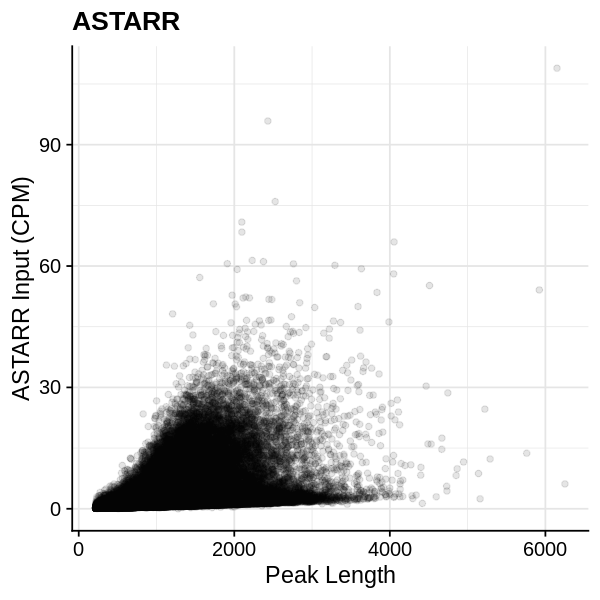

In [11]:
dat = dat_peak_score

gpt = ggplot(dat, aes(x=Length, y=Input)) +
    geom_point(alpha = 0.1) + 
    labs(x="Peak Length", y="ASTARR Input (CPM)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

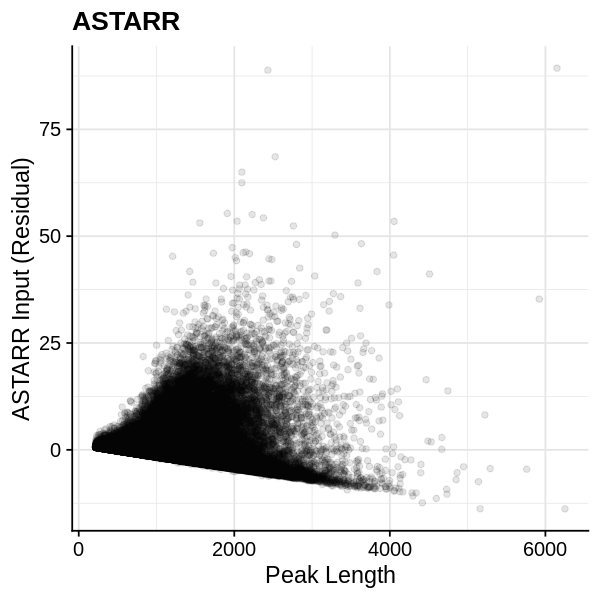

In [12]:
dat = dat_peak_score

gpt = ggplot(dat, aes(x=Length, y=Input_Residual)) +
    geom_point(alpha = 0.1) + 
    labs(x="Peak Length", y="ASTARR Input (Residual)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

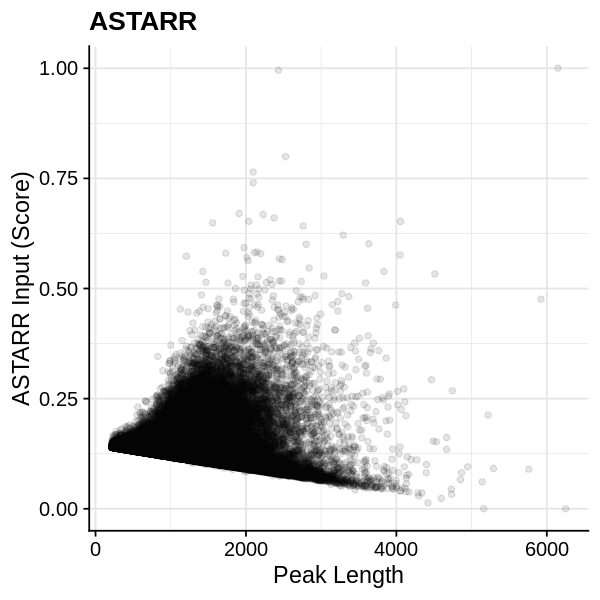

In [13]:
dat = dat_peak_score

gpt = ggplot(dat, aes(x=Length, y=Input_Score)) +
    geom_point(alpha = 0.1) + 
    labs(x="Peak Length", y="ASTARR Input (Score)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

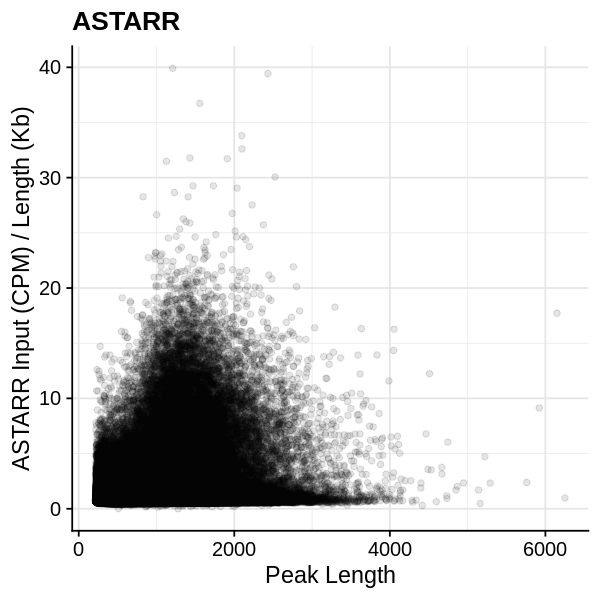

In [15]:
dat = dat_peak_score

gpt = ggplot(dat, aes(x=Length, y=Input_FPKM)) +
    geom_point(alpha = 0.1) + 
    labs(x="Peak Length", y="ASTARR Input (CPM) / Length (Kb)", title="ASTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)